In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import seaborn as sns


In [2]:
file_path = "/home/federica/LAB2/egfr_qsar/final_main.csv" 
df = pd.read_csv(file_path)

In [3]:
def prepare_data(df):
    numerical_data = df.select_dtypes(include=[np.number])
    
    numerical_data = numerical_data.dropna(axis=1, how='any')
    return numerical_data

data = prepare_data(df)

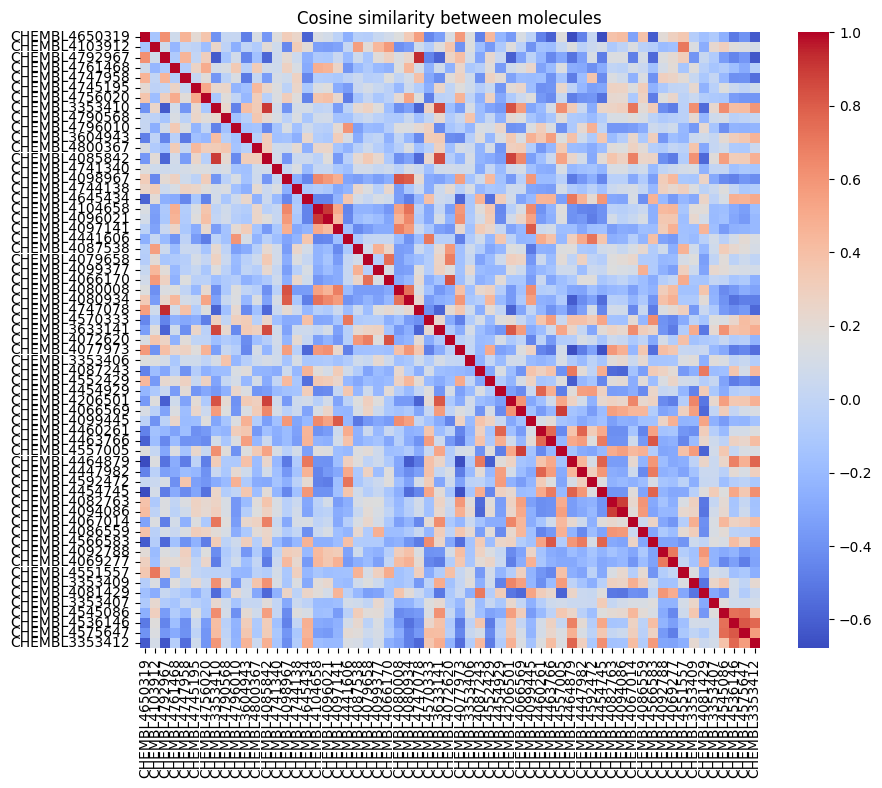

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
similarity_matrix = cosine_similarity(scaled_data)

def plot_similarity_heatmap(similarity_matrix, molecule_ids):
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, cmap='coolwarm', annot=False, fmt='.2f', xticklabels=molecule_ids, yticklabels=molecule_ids)
    plt.title('Cosine similarity between molecules')

    plt.show()

plot_similarity_heatmap(similarity_matrix, df['Molecule ChEMBL ID'])

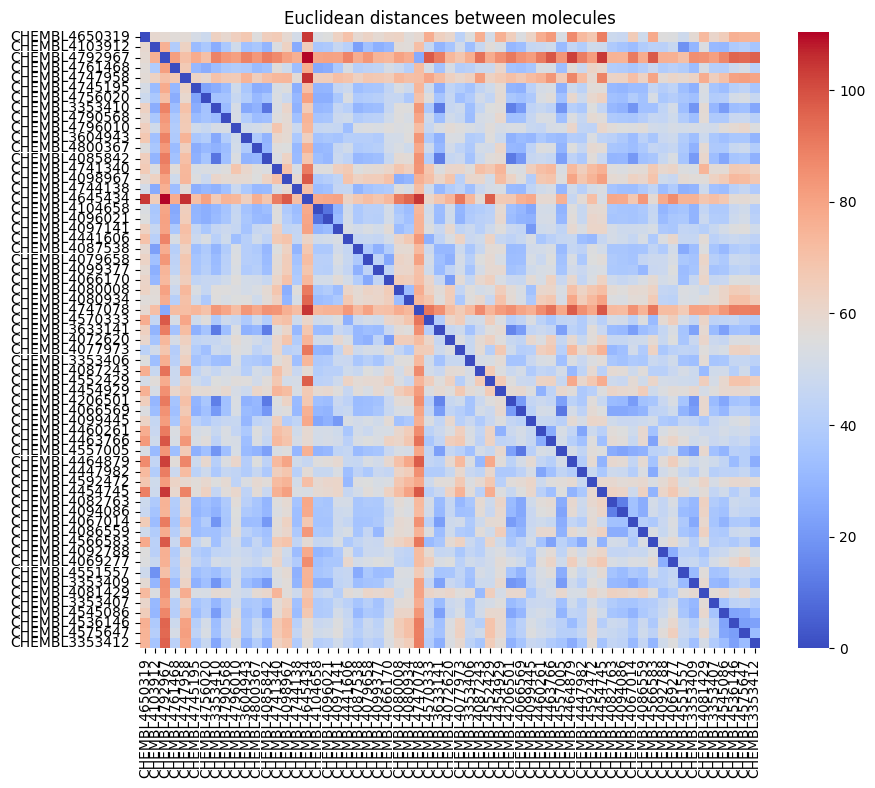

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
similarity_matrix = euclidean_distances(scaled_data)

def plot_similarity_heatmap(similarity_matrix, molecule_ids):
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, cmap='coolwarm', annot=False, fmt='.2f', xticklabels=molecule_ids, yticklabels=molecule_ids)
    plt.title('Euclidean distances between molecules')
    plt.show()

plot_similarity_heatmap(similarity_matrix, df['Molecule ChEMBL ID'])

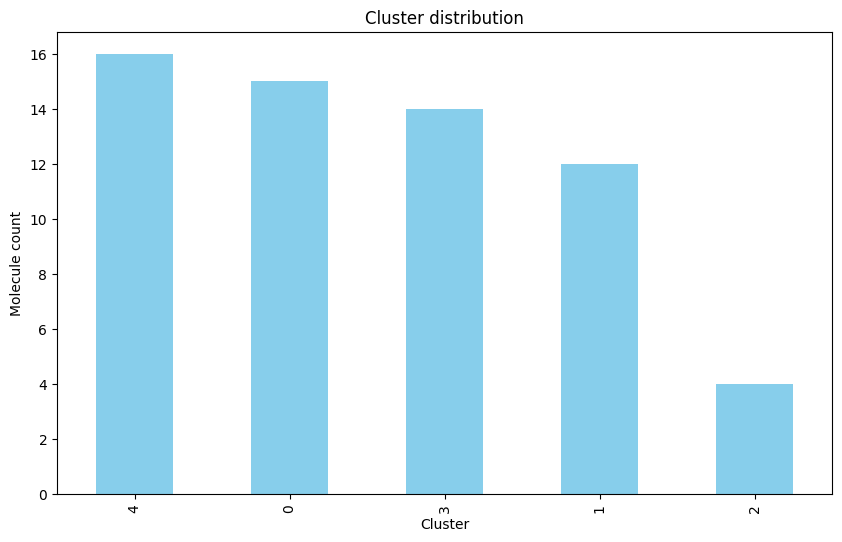

In [6]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(similarity_matrix)

plt.figure(figsize=(10, 6))
df['Cluster'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Cluster distribution')
plt.xlabel('Cluster')
plt.ylabel('Molecule count')
plt.show()

In [15]:
pca = PCA(n_components=10, svd_solver='auto', random_state=42)
pca_results = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
total_explained_variance = np.cumsum(explained_variance)

tsne = TSNE(n_components=2,
                        perplexity=30, learning_rate=200,
                        max_iter=1000,
                        random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

def plot_results(pca_results, tsne_results, explained_variance, cluster_labels):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    cluster_colors = {0: 'blue', 1: 'green', 2: 'orange', 3: 'yellow', 4: 'red'}

    scatter_pca = axes[0].scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.7, 
                                  c=[cluster_colors[label] for label in cluster_labels], s=50)

    axes[0].set_title(f'PCA: Variance\nPC1={total_explained_variance[0]:.2%}, PC2={total_explained_variance[1]:.2%}')
    axes[0].set_xlabel('PC1')
    axes[0].set_ylabel('PC2')

    scatter_tsne = axes[1].scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.7, 
                                   c=[cluster_colors[label] for label in cluster_labels], s=50)
    axes[1].set_title('t-SNE: 2D projection')
    axes[1].set_xlabel('t-SNE 1')
    axes[1].set_ylabel('t-SNE 2')

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
               for color in cluster_colors.values()]
    labels = [f'Cluster {i}' for i in cluster_colors.keys()]

    axes[0].legend(handles, labels, title="Clusters", loc='upper left')
    #axes[1].legend(handles, labels, title="Clusters", loc='upper left')

    plt.tight_layout()
    plt.show()


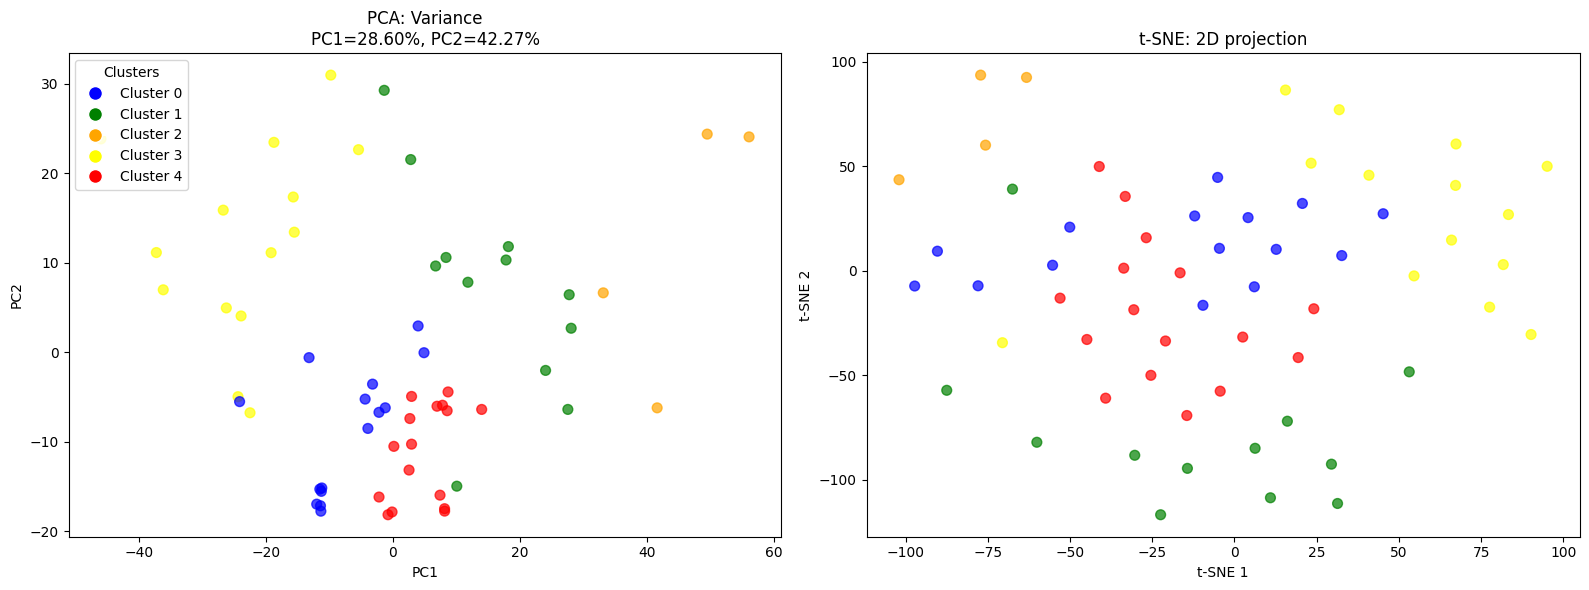

total_explained_variance: [0.28595156 0.42268491 0.55169005 0.61444102 0.6608915  0.69530699
 0.72520875 0.75118209 0.77478985 0.79720748]


In [14]:
plot_results(pca_results, tsne_results, explained_variance, df['Cluster'])
print(f'total_explained_variance: {total_explained_variance}')

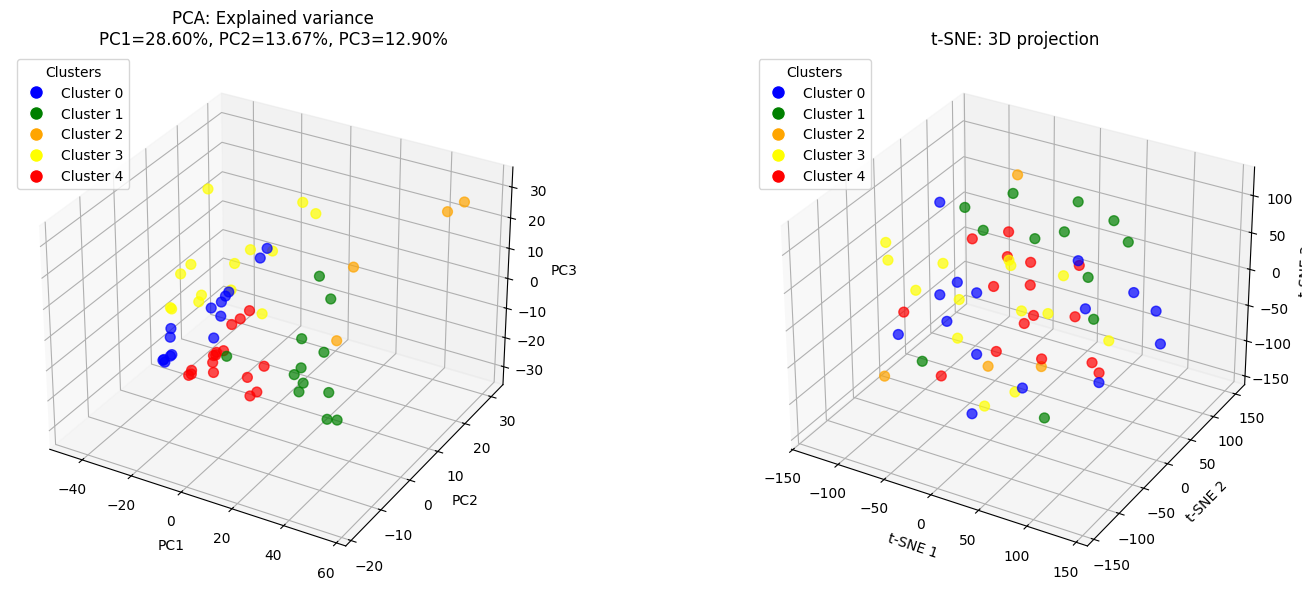

total_explained_variance: [0.28595156 0.42268491 0.55169005 0.61444102 0.6608915  0.695307
 0.7252088  0.75118225 0.77479013 0.7972093  0.81577789 0.83308471
 0.84828309 0.86254147 0.87572486]


In [20]:
# PCA
pca = PCA(n_components=15)
pca_results = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_
total_explained_variance = np.cumsum(explained_variance)

# t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

def plot_results(pca_results, tsne_results, explained_variance, cluster_labels):
    fig = plt.figure(figsize=(16, 6))

    cluster_colors = {0: 'blue', 1: 'green', 2: 'orange', 3: 'yellow', 4: 'red'}

    ax_pca = fig.add_subplot(121, projection='3d')
    scatter_pca = ax_pca.scatter(pca_results[:, 0], pca_results[:, 1], pca_results[:, 2], alpha=0.7, 
                                 c=[cluster_colors[label] for label in cluster_labels], s=50)
    ax_pca.set_title(f'PCA: Explained variance\nPC1={explained_variance[0]:.2%}, PC2={explained_variance[1]:.2%}, PC3={explained_variance[2]:.2%}')
    ax_pca.set_xlabel('PC1')
    ax_pca.set_ylabel('PC2')
    ax_pca.set_zlabel('PC3')

    ax_tsne = fig.add_subplot(122, projection='3d')
    scatter_tsne = ax_tsne.scatter(tsne_results[:, 0], tsne_results[:, 1], tsne_results[:, 2], alpha=0.7, 
                                   c=[cluster_colors[label] for label in cluster_labels], s=50)
    ax_tsne.set_title('t-SNE: 3D projection')
    ax_tsne.set_xlabel('t-SNE 1')
    ax_tsne.set_ylabel('t-SNE 2')
    ax_tsne.set_zlabel('t-SNE 3')

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
               for color in cluster_colors.values()]
    labels = [f'Cluster {i}' for i in cluster_colors.keys()]

    ax_pca.legend(handles, labels, title="Clusters", loc='upper left')
    ax_tsne.legend(handles, labels, title="Clusters", loc='upper left')

    plt.tight_layout()
    plt.show()

plot_results(pca_results, tsne_results, explained_variance, df['Cluster'])
print(f"total_explained_variance: {total_explained_variance}")

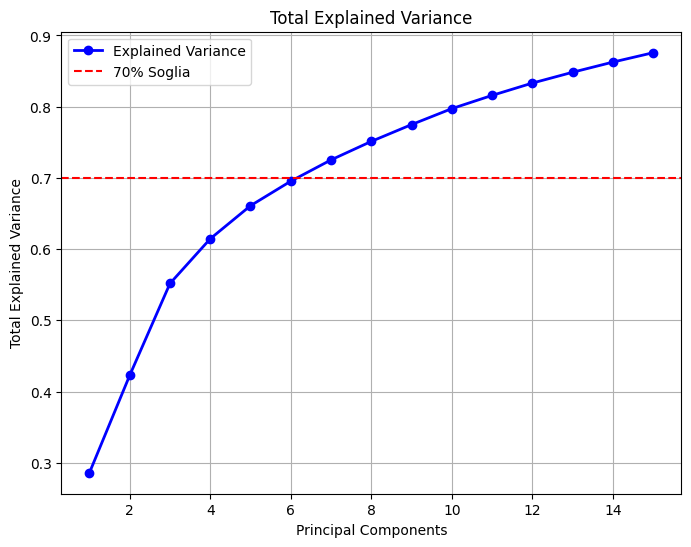

In [21]:
plt.figure(figsize=(8, 6))
components = np.arange(1,len(total_explained_variance)+1)
plt.plot(components, total_explained_variance, marker='o', color='b',linestyle='-', linewidth=2, label='Explained Variance')

plt.xlabel('Principal Components')
plt.ylabel('Total Explained Variance')
plt.title('Total Explained Variance')
plt.axhline(0.70, color='r', linestyle='--', label='70% Soglia')
plt.grid(True)
plt.legend()
plt.show()
